In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [43]:
paper = pd.DataFrame()

# Some data to play with.
paper['acid_durability'] = [7, 5, 4, 2, 7, 6, 3, 1, 6, 6, 
                    6, 3, 4, 5, 7, 6, 4, 3, 7, 2, 
                     6, 5, 7, 2, 3, 4, 1, 5, 6, 7]
paper['strength'] = [4, 6, 4, 7, 7, 2, 3, 5, 1, 2, 
                     4, 6, 7, 3, 3, 5, 2, 5, 1, 6, 
                     6, 7, 4, 4, 3, 5, 2, 6, 7, 6]

#Identify if paper quality is good or not.
paper['good'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1]

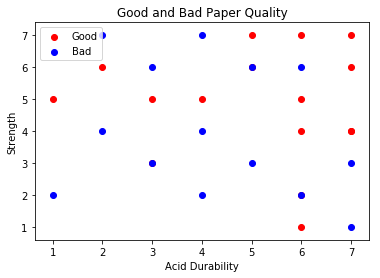

In [44]:
#Analyzing the data.
plt.scatter(
    paper[paper['good'] == 1].acid_durability,
    paper[paper['good'] == 1].strength,
    color = 'red'
)
plt.scatter(
    paper[paper['good'] == 0].acid_durability,
    paper[paper['good'] == 0].strength,
    color = 'blue'
)

plt.legend(['Good', 'Bad'])
plt.title('Good and Bad Paper Quality')
plt.xlabel('Acid Durability')
plt.ylabel('Strength')
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = paper[['acid_durability', 'strength']]
Y = paper.good
neighbors.fit(X,Y)

## Predict for a paper that has 7 acidity and 3 strength long.
neighbors.predict([[7, 3]])
#Model shows that it's a good quality paper. 

array([0])

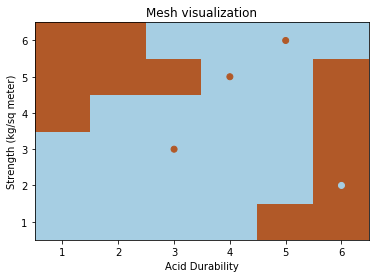

In [46]:
#Converting from data frames to arrays
X = np.array(X)
Y = np.array(Y)

#Mesh size (calculate the value for each point in a grid where the points are spaced 1 away from each other)
h = 1

#Plot the decision bounday. Assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Acid Durability')
plt.ylabel('Strength (kg/sq meter)')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#Any new point that fell within a blue area would be predicted to be good, 
#and any point that fell within a brown area would be predicted to be bad.